# Proje 1 - Pandas ile Veri Analizi (120 puan)
* Aşağıda belirtilen soruların cevaplarını, ilgili boş hücrelere yazınız ve adı öğrenci numaranızdan oluşan nihai Jupyter Notebook (.ipynb) dosyasını, __23.06.2023 Cuma saat 23:59'a kadar__ EgeDers web sitesinde ilgili ders sayfasını kullanarak sisteme yükleyiniz.
* Sistem __25.06.2023 Pazar saat 23:59'a kadar__ açık kalacaktır ancak gecikilen her gün için proje notunda %20 kesinti yapılacaktır. 
* Çözümlerinizde ```for``` v.b. döngüler yerine ```pandas``` kütüphanesinin kullanılması gerekmektedir.
* Çözümler arasında belirli bir oranın üstünde benzerlik tespit edildiğinde, bu çözümlerin notunda aynı oranda kesinti yapılacaktır veya bu çözümler sıfır alacaktır.
* Herhangi bir sorunuz olursa, EgeDers web sitesindeki ilgili ders sayfasında bu proje ile ilgili açılan forumu kullanınız.

## Soru 1 (12 puan):
* Bir derse kaydolan öğrencilerin listesini içeren ekteki "Ogrenci Listesi.xls" dosyasını ```ogr_list``` adlı DataFrame'e okuyun.
* İlk sütunu silin.
* "Açıklama" sütunundaki ```Nan``` değerlerini ```İlk``` değeri ile, diğer değerleri ise ```Tekrar``` değeri ile değiştirin.
* "Açıklama" sütununun ismini "Tekrar Durumu" olacak şekilde değiştirin.
* Öğrenci numarasının 4. ve 5. karakterleri, öğrencinin okula giriş yılının son 2 basamağını temsil etmektedir. Buna göre DataFrame'e, öğrencilerin okula giriş yılı verilerini ```20##``` formatında içeren "Okula Giriş Yılı" isimli bir sütun ekleyin.
* "Öğrenci No" sütununu DataFrame'in index'i yapın.
* En son oluşan DataFrame'in satır ve sütun sayısını yazdırın.

In [105]:
import pandas as pd

# Read the file into a DataFrame
ogr_list = pd.read_excel("Ogrenci Listesi.xls")

# Drop the first column
ogr_list = ogr_list.drop(columns=["No"])

# Replace non-NaN values in the "Açıklama" column with "tekrar"
ogr_list.loc[ogr_list["Açıklama"].notna(), "Açıklama"] = "tekrar"

# Replace NaN values in the "Açıklama" column with "İlk"
ogr_list["Açıklama"].fillna("İlk", inplace=True)



# Rename the "Açıklama" column to "Repeat Status"
ogr_list = ogr_list.rename(columns={"Açıklama": "Repeat Status"})

# Extract the last 2 digits of the student number as the entry year
ogr_list["Entry Year"] = "20" + ogr_list["Öğrenci No"].str[3:5]

# Set the "Öğrenci No" column as the index of the DataFrame
ogr_list.set_index("Öğrenci No", inplace=True)

# Print the number of rows and columns in the resulting DataFrame
num_rows, num_cols = ogr_list.shape
print(f"Number of rows in the DataFrame: {num_rows}")
print(f"Number of columns in the DataFrame: {num_cols}")


Number of rows in the DataFrame: 241
Number of columns in the DataFrame: 2


## Soru 2 (12 puan):
* Öğrencilerin okula giriş yıllarının dersi tekrar durumlarına göre dağılımını (öğrenci sayılarını), yatay yığılmış (stacked) sütun grafik olarak gösterin.
* Derse tekrar kaydolan öğrencilerin, okula kayıt yıllarına göre dağılımlarını (yüzdelerini) pasta grafik olarak gösterin.

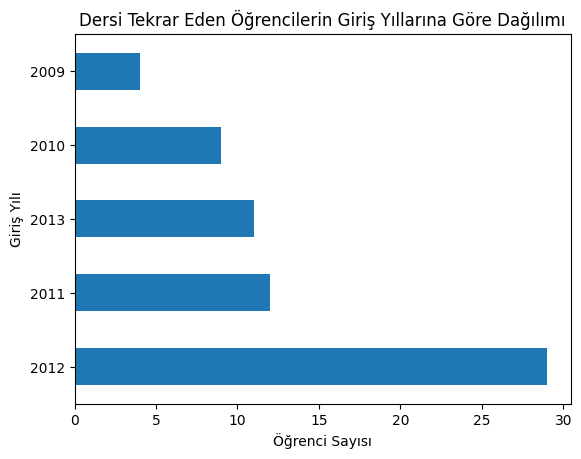

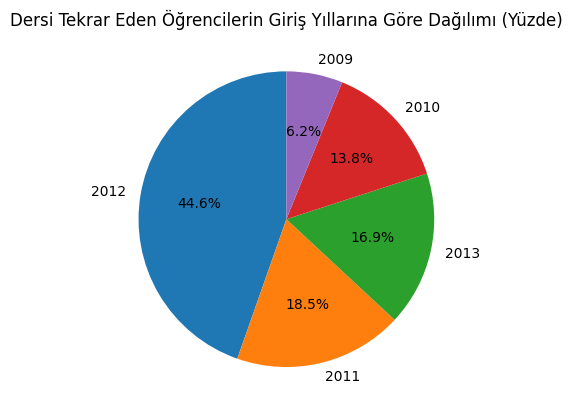

In [106]:
import matplotlib.pyplot as plt

# Filter the data for students with repeat status "tekrar"
repeat_students = ogr_list[ogr_list["Repeat Status"] == "tekrar"]

# Calculate the distribution of entry years for repeat students
entry_year_distribution = repeat_students["Entry Year"].value_counts()

# Plotting the distribution of entry years as a stacked horizontal bar chart
entry_year_distribution.plot(kind="barh", stacked=True)
plt.xlabel("Öğrenci Sayısı")
plt.ylabel("Giriş Yılı")
plt.title("Dersi Tekrar Eden Öğrencilerin Giriş Yıllarına Göre Dağılımı")
plt.show()

# Calculate the percentage distribution of entry years for repeat students
entry_year_percentage = (entry_year_distribution / len(repeat_students)) * 100

# Plotting the percentage distribution of entry years as a pie chart
entry_year_percentage.plot(kind="pie", autopct="%.1f%%", startangle=90)
plt.title("Dersi Tekrar Eden Öğrencilerin Giriş Yıllarına Göre Dağılımı (Yüzde)")
plt.ylabel("")
plt.show()


## Soru 3 (20 puan):
* Bu derse ilk kez kaydolan öğrenciler, laboratuvar saatlerine girmek ve orada verilen ödevleri yapmak zorundadır. Derse tekrar kaydolan öğrenciler ise dönem başında laboratuvar saatlerine girmek isteyip istemediklerini bildirmektedirler ve girmek istiyorlarsa yine orada verilen ödevleri yapmak zorundadırlar. Buna göre dersin laboratuvar saatlerine giren öğrencilerin orada verilen ödevlerden aldıkları notları içeren ekteki "Lab Notlari.xls" dosyasını ```lab_notlari``` adlı DataFrame'e okuyun.
* İlk sütunu silin.
* "Öğrenci No" sütununu DataFrame'in index'i yapın.
* "Lab-* Notu" sütunlarındaki eksik veriler, öğrencinin mazereti nedeniyle ilgili ödevden muaf olduğunu göstermektedir. Buna göre DataFrame'e, öğrencilerin mazeretli olmadıkları laboratuvar saatlerinde verilen ödevlerden aldıkları notların ortalamasını (en düşük 2 not dışarıda bırakılacaktır ve en yakın tamsayıya yuvarlatılacaktır) içeren "Lab Notu" isimli bir sütun ekleyin.
* En son oluşan DataFrame'in satır ve sütun sayısını yazdırın.
* Lab saatlerinde verilen ödevlerin (10 adet) sınıf not ortalamalarını gösteren bir sütun grafik oluşturun.

Number of rows: 182
Number of columns: 11


,Lab-1 Notu,Lab-2 Notu,Lab-3 Notu,Lab-4 Notu,Lab-5 Notu,Lab-6 Notu,Lab-7 Notu,Lab-8 Notu,Lab-9 Notu,Lab-10 Notu,Lab Notu
Öğrenci No,,,,,,,,,,,
MUH1000065,94.0,93.0,98.0,97.0,65.0,50,58.0,90.0,75.0,25.0,84
MUH1000091,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
MUH1000975,65.0,92.0,100.0,98.0,80.0,64,90.0,91.0,89.0,80.0,90
MUH1000990,70.0,88.0,98.0,75.0,50.0,45,62.0,NaN,1.0,45.0,67
MUH1200826,58.0,82.0,80.0,66.0,50.0,51,66.0,55.0,3.0,0.0,64
...,...,...,...,...,...,...,...,...,...,...,...
MUH1410150,NaN,NaN,NaN,18.0,10.0,22,78.0,67.0,75.0,25.0,42
MUH1410152,NaN,NaN,NaN,0.0,40.0,50,0.0,50.0,75.0,50.0,38
MUH1410153,NaN,NaN,NaN,0.0,0.0,0,0.0,0.0,0.0,0.0,0


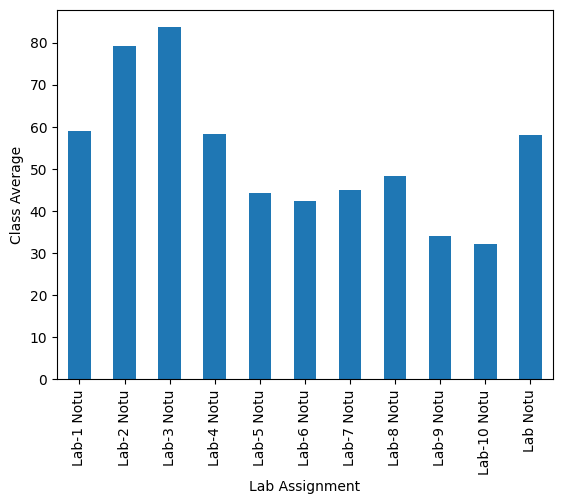

In [107]:

# Read the "Lab Notlari.xls" file into lab_notlari DataFrame
lab_notlari = pd.read_excel("Lab Notlari.xls")

# Drop the first column
lab_notlari.drop(columns=["No"], inplace=True)

# Set "Öğrenci No" column as the index of the DataFrame
lab_notlari.set_index("Öğrenci No", inplace=True)

# Calculate the average lab grade by excluding the lowest 2 grades for each student
lab_notlari["Lab Notu"] = lab_notlari.loc[:, "Lab-1 Notu":"Lab-10 Notu"].apply(
    lambda row: round(row.dropna().nlargest(8).mean()), axis=1
)

# Get the number of rows and columns in the DataFrame
num_rows, num_cols = lab_notlari.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

# Calculate the class average for each lab assignment
lab_assignment_means = lab_notlari.loc[:, "Lab-1 Notu":"Lab Notu"].mean()

# Plot the column graph of class average for lab assignments
lab_assignment_means.plot(kind="bar", xlabel="Lab Assignment", ylabel="Class Average")

lab_notlari




## Soru 4 (20 puan):
* Bu derste öğrencilere 2 adet proje verilmektedir. Öğrenciler projeleri isterlerse tek başlarına, isterlerse 2 kişilik grup oluşturarak yapabilmektedir. Grup oluşturulurken öğrencilerin numaraları alt çizgi (_) karakteri ile birleştirilmektedir. Grup üyeleri projeden aynı notu almaktadır. Buna göre projeleri teslim eden öğrencilerin/grupların projelerden aldıkları notları içeren ekteki "1.Proje Notlari.xls" ve "2.Proje Notlari.xls" dosyalarını sırasıyla ```proje1_notlari``` ve ```proje2_notlari``` adlı DataFrame'lere okuyun.
* İkinci proje notu en yüksek ve en düşük olan öğrencilerin/grupların numaralarını yazdırın.
* ```proje1_notlari``` ve ```proje2_notlari``` adlı DataFrame'leri, index'i "Öğrenci No" olan ve projeyi teslim eden her öğrencinin ayrı ayrı notunun yer aldığı DataFrame'ler haline getirin. Bir başka deyişle, ```proje1_notlari``` DataFrame'inin index'i "Öğrenci No" olmalı ve "1. Proje Notu" isimli bir sütun içermelidir. Benzer şekilde, ```proje2_notlari``` DataFrame'inin index'i "Öğrenci No" olmalı ve "2. Proje Notu" isimli bir sütun içermelidir.
* En son oluşan DataFrame'lerin satır sayılarını yazdırın.

In [108]:

# Read the "1.Proje Notlari.xls" file into proje1_notlari DataFrame
proje1_notlari = pd.read_excel("1.Proje Notlari.xls")

# Read the "2.Proje Notlari.xls" file into proje2_notlari DataFrame
proje2_notlari = pd.read_excel("2.Proje Notlari.xls")

# Find the highest and lowest grades for project 2
highest_grade = proje2_notlari["2. Proje Notu"].max()
lowest_grade = proje2_notlari["2. Proje Notu"].min()

# Find the student/group number with the highest and lowest grades for project 2
highest_grade_row = proje2_notlari.loc[proje2_notlari["2. Proje Notu"] == highest_grade]
lowest_grade_row = proje2_notlari.loc[proje2_notlari["2. Proje Notu"] == lowest_grade]

highest_grade_student_no = highest_grade_row["Öğrenci/Grup No "].values[0]
lowest_grade_student_no = lowest_grade_row["Öğrenci/Grup No "].values[0]

# Print the student/group number along with the highest and lowest grades for project 2
print("Student/Group Number with the Highest Grade for Project 2:", highest_grade_student_no)
print("Student/Group Number with the Lowest Grade for Project 2:", lowest_grade_student_no)

# Set "Öğrenci No" as the index for proje1_notlari DataFrame and rename the column
proje1_notlari.set_index("Öğrenci/Grup No ", inplace=True)
proje1_notlari = proje1_notlari.drop(columns=["No"])


# Set "Öğrenci No" as the index for proje2_notlari DataFrame and rename the column
proje2_notlari.set_index("Öğrenci/Grup No ", inplace=True)
proje2_notlari = proje2_notlari.drop(columns=["No"])

# Get the number of rows in the final DataFrame
num_rows_proje1 = proje1_notlari.shape[0]
num_rows_proje2 = proje2_notlari.shape[0]

# Print the number of rows in the final DataFrames
print("Number of rows in proje1_notlari DataFrame:", num_rows_proje1)
print("Number of rows in proje2_notlari DataFrame:", num_rows_proje2)


Student/Group Number with the Highest Grade for Project 2: MUH1300278_MUH1200284
Student/Group Number with the Lowest Grade for Project 2: MUH1400706
Number of rows in proje1_notlari DataFrame: 130
Number of rows in proje2_notlari DataFrame: 103


## Soru 5 (3 puan):
* Bu dersin ara sınav notlarını içeren ekteki "Arasinav Notlari.xls" dosyasını ```vize_notlari``` adlı DataFrame'e okuyun.
* İlk sütunu silin.
* "Öğrenci No" sütununu DataFrame'in index'i yapın.

In [109]:

# Read the "Arasinav Notlari.xls" file into vize_notlari DataFrame
vize_notlari = pd.read_excel("Arasinav Notlari.xls")

# Drop the first column from the DataFrame
vize_notlari.drop(vize_notlari.columns[0], axis=1, inplace=True)

# Set "Öğrenci No" as the index for the DataFrame
vize_notlari.set_index("Öğrenci No", inplace=True)

# Print the updated DataFrame
print(vize_notlari)


            Arasınav Notu
Öğrenci No               
MUH0907596           27.0
MUH0910100           34.0
MUH0900038           38.0
MUH0900056           80.0
MUH1000002           32.0
...                   ...
MUH1410150           78.0
MUH1410152           68.0
MUH1410153            NaN
MUH1410154           75.0
MUH1410155           10.0

[241 rows x 1 columns]


## Soru 6 (5 puan):
* Bu dersin final sınavı notlarını içeren ekteki "Final Sinavi Notlari.xls" dosyasını, son 2 satırı hariç, ```final_notlari``` adlı DataFrame'e okuyun.
* İlk sütunu silin.
* "Öğrenci No" sütununu DataFrame'in index'i yapın.
* "Final Sınavı Notu" sütunundaki öğrencinin sınava girmediğini belirten ```-1``` değerlerini ```NaN``` değeri ile değiştirin.

In [110]:

# Read the "Final Sinavi Notlari.xls" file into final_notlari DataFrame
final_notlari = pd.read_excel("Final Sinavi Notlari.xls", skipfooter=2)

# Drop the first column from the DataFrame
final_notlari.drop(final_notlari.columns[0], axis=1, inplace=True)

# Set "Öğrenci No" as the index for the DataFrame
final_notlari.set_index("Öğrenci No", inplace=True)

# Replace "-1" values in "Final Sınavı Notu" column with NaN
final_notlari["Final Sınavı Notu"].replace(-1, pd.NA, inplace=True)

# Print the updated DataFrame
print(final_notlari)


           Final Sınavı Notu
Öğrenci No                  
MUH0907596                 4
MUH0910100                41
MUH0900038              <NA>
MUH0900056                29
MUH1000002              <NA>
...                      ...
MUH1410150                40
MUH1410152                30
MUH1410153              <NA>
MUH1410154                39
MUH1410155                11

[241 rows x 1 columns]


## Soru 7 (3 puan):
* Bu dersin bütünleme sınavına giren öğrencilerin notlarını içeren ekteki "Butunleme Sinavi Notlari.xls" dosyasını ```butunleme_notlari``` adlı DataFrame'e okuyun.
* İlk sütunu silin.
* "Öğrenci No" sütununu DataFrame'in index'i yapın.

In [111]:

# Read the "Butunleme Sinavi Notlari.xls" file into butunleme_notlari DataFrame
butunleme_notlari = pd.read_excel("Butunleme Sinavi Notlari.xls")

# Drop the first column from the DataFrame
butunleme_notlari.drop(butunleme_notlari.columns[0], axis=1, inplace=True)

# Set "Öğrenci No" as the index for the DataFrame
butunleme_notlari.set_index("Öğrenci No", inplace=True)

# Print the updated DataFrame
print(butunleme_notlari)


            Bütünleme Sınavı Notu
Öğrenci No                       
MUH0907596                      1
MUH0900056                     13
MUH1000029                     62
MUH1000990                     47
MUH1100024                     49
...                           ...
MUH1410142                     77
MUH1410148                     57
MUH1410150                     76
MUH1410154                     38
MUH1410155                      6

[119 rows x 1 columns]


## Soru 8 (24 puan):
* Derse kayıtlanan tüm öğrencilerin tüm notlarını içermesi için ```ogr_list``` adlı DataFrame'i "Öğrenci No" aracılığıyla diğer tüm DataFrame'ler ile birleştirin, bu sırada ```lab_notlari``` DataFrame'inden sadece "Lab Notu" sütununun alınmasını sağlayın.
* ```ogr_list``` DataFrame'nin "1. Proje Notu", "2. Proje Notu" ve "Arasınav Notu" sütunlarındaki ```Nan``` değerlerini ```0``` değeri ile değiştirin.
* Öğrencilerin bu derse ilişkin proje notu, 1. proje notunun 3/7'si ile 2. proje notunun 4/7'si toplanarak (en yakın tamsayıya yuvarlatılacaktır) bulunmaktadır. Buna göre DataFrame'e, "Proje Notu" isimli bir sütun ekleyin.
* Bu derse tekrar kaydolan öğrencilerden laboratuvar saatlerine girmek isteyen, dolayısıyla orada verilen ödevleri de yapan öğrencilerin numara, lab notu ve proje notu verilerini listeleyin.
* Bu derse tekrar kaydolan öğrencilerden laboratuvar saatlerine girmek istemeyen, dolayısıyla orada verilen ödevleri yapmayan öğrencilerin proje notları, aynı zamanda lab notu yerine de sayılmaktadır. Buna göre "Lab Notu" sütunundaki ```Nan``` değerlerini, ilgili öğrencilerin "Proje Notu" sütunundaki değerleri ile değiştirin.
* Öğrencilerin bu derse ilişkin dönem sonu notu, lab notunun %13'ü, proje notunun %22,75'i, ara sınav notunun %29,25'i ve final/bütünleme sınavı notunun %35'i toplanarak (en yakın tamsayıya yuvarlatılacaktır) bulunmaktadır. Ancak öğrenci final ve bütünleme sınavlarına girmediyse, dönem sonu notu doğrudan 0 olmaktadır. Ayrıca öğrenci hem final hem bütünleme sınavına girdiyse, final sınavı notu geçerliliğini kaybetmektedir. Buna göre DataFrame'e, "Dönem Sonu Notu" isimli bir sütun ekleyin.

In [112]:



# Merge ogr_list DataFrame with other DataFrames using "Öğrenci No" and "Öğrenci/Grup No" as keys
merged_data = ogr_list.merge(lab_notlari["Lab Notu"], on="Öğrenci No", how="left")
merged_data = merged_data.merge(proje1_notlari, left_on="Öğrenci No", right_on="Öğrenci/Grup No ", how="left", right_index=True)
merged_data = merged_data.merge(proje2_notlari, left_on="Öğrenci No", right_on="Öğrenci/Grup No ", how="left", right_index=True)
merged_data = merged_data.merge(vize_notlari, on="Öğrenci No", how="left")
merged_data = merged_data.merge(final_notlari, on="Öğrenci No", how="left")
merged_data = merged_data.merge(butunleme_notlari, on="Öğrenci No", how="left")

# Replace NaN values in "1. Proje Notu", "2. Proje Notu", and "Arasınav Notu" with 0
merged_data["1. Proje Notu"].fillna(0, inplace=True)
merged_data["2. Proje Notu"].fillna(0, inplace=True)
merged_data["Arasınav Notu"].fillna(0, inplace=True)

# Calculate "Proje Notu" as the sum of the weighted average of "1. Proje Notu" and "2. Proje Notu"
merged_data["Proje Notu"] = (merged_data["1. Proje Notu"] * 3/7) + (merged_data["2. Proje Notu"] * 4/7).round()

# Filter for students who want to attend lab sessions and complete the assignments
lab_participants = merged_data[(merged_data["Repeat Status"] == "Repeat") & (merged_data["Lab Notu"].notna())]
lab_participants
# Filter for students who do not want to attend lab sessions and do not complete the assignments
no_lab_participants = (merged_data["Repeat Status"] == "Repeat") & (merged_data["Lab Notu"].isna())
merged_data.loc[no_lab_participants, "Lab Notu"] = merged_data.loc[no_lab_participants, "Proje Notu"]

# Replace NaN values with 0 in relevant columns for calculation
merged_data["Lab Notu"].fillna(0, inplace=True)
merged_data["Proje Notu"].fillna(0, inplace=True)
merged_data["Arasınav Notu"].fillna(0, inplace=True)
merged_data["Final Sınavı Notu"].fillna(0, inplace=True)

# Calculate the "Dönem Sonu Notu" as per the given formula (rounded to the nearest integer)
merged_data["Dönem Sonu Notu"] = ((merged_data["Lab Notu"] * 0.13) +
                                 (merged_data["Proje Notu"] * 0.2275) +
                                 (merged_data["Arasınav Notu"] * 0.2925) +
                                 (merged_data["Final Sınavı Notu"] * 0.35)).round().astype(int)

# Print the row and column count of the final DataFrame
print("Row count:", merged_data.shape[0])
print("Column count:", merged_data.shape[1])

merged_data


Row count: 241
Column count: 10


,Repeat Status,Entry Year,Lab Notu,1. Proje Notu,2. Proje Notu,Arasınav Notu,Final Sınavı Notu,Bütünleme Sınavı Notu,Proje Notu,Dönem Sonu Notu
Öğrenci No,,,,,,,,,,
MUH0907596,tekrar,2009,0.0,0.0,0.0,27.0,4,1.0,0.0,9
MUH0910100,tekrar,2009,0.0,0.0,40.0,34.0,41,NaN,23.0,30
MUH0900038,tekrar,2009,0.0,0.0,0.0,38.0,0,NaN,0.0,11
MUH0900056,tekrar,2009,0.0,0.0,0.0,80.0,29,13.0,0.0,34
MUH1000002,tekrar,2010,0.0,49.0,15.0,32.0,0,NaN,30.0,16
...,...,...,...,...,...,...,...,...,...,...
MUH1410150,İlk,2014,42.0,0.0,0.0,78.0,40,76.0,0.0,42
MUH1410152,İlk,2014,38.0,0.0,0.0,68.0,30,NaN,0.0,35
MUH1410153,İlk,2014,0.0,0.0,0.0,0.0,0,NaN,0.0,0


## Soru 9 (13 puan):
* Dönem sonu notuna göre en başarılı 5 öğrencinin lab, proje, ara sınav ve final sınavı notlarını gösteren bir çizgi grafik oluşturun.
* Dönem sonu notlarının dağılımını bir histogram grafiği ile gösterin.
* 15 ve üzerindeki dönem sonu notlarını dikkate alarak sınıfın ortalamasını, standart sapmasını ve medyanını bulun.

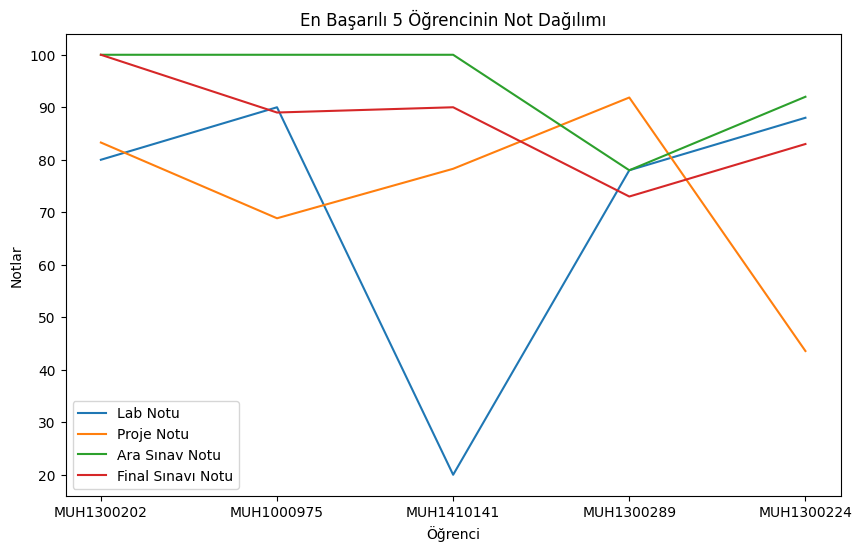

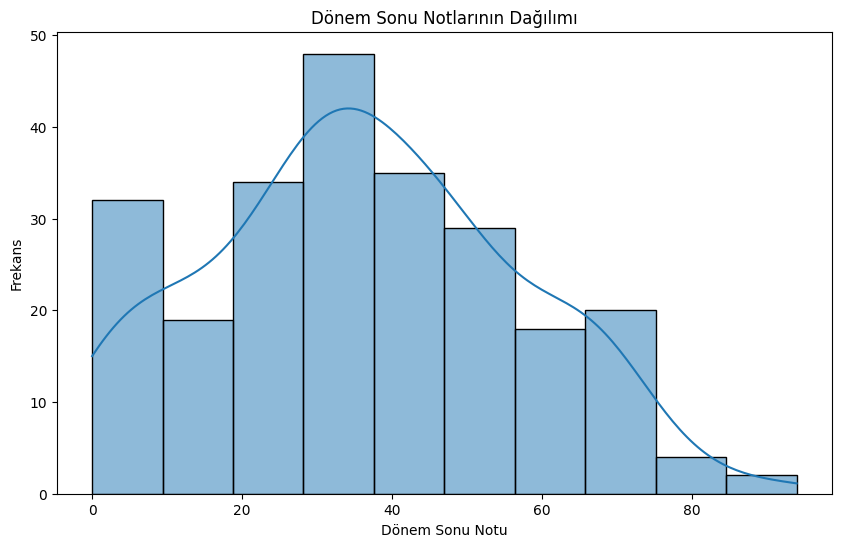

Sınıf Ortalaması: 42.455
Standart Sapma: 16.681707702129792
Medyan: 40.0


In [113]:
import matplotlib.pyplot as plt
import seaborn as sns


top_students = merged_data.nlargest(5, "Dönem Sonu Notu")

top_students

plt.figure(figsize=(10, 6))
plt.plot(top_students.index, top_students["Lab Notu"], label="Lab Notu")
plt.plot(top_students.index, top_students["Proje Notu"], label="Proje Notu")
plt.plot(top_students.index, top_students["Arasınav Notu"], label="Ara Sınav Notu")
plt.plot(top_students.index, top_students["Final Sınavı Notu"], label="Final Sınavı Notu")

plt.xlabel("Öğrenci")
plt.ylabel("Notlar")
plt.title("En Başarılı 5 Öğrencinin Not Dağılımı")
plt.legend()
plt.show()



plt.figure(figsize=(10, 6))
sns.histplot(merged_data["Dönem Sonu Notu"], bins=10, kde=True)
plt.xlabel("Dönem Sonu Notu")
plt.ylabel("Frekans")
plt.title("Dönem Sonu Notlarının Dağılımı")
plt.show()


filtered_data = merged_data[merged_data["Dönem Sonu Notu"] >= 15]
class_average = filtered_data["Dönem Sonu Notu"].mean()
standard_deviation = filtered_data["Dönem Sonu Notu"].std()
median = filtered_data["Dönem Sonu Notu"].median()

print("Sınıf Ortalaması:", class_average)
print("Standart Sapma:", standard_deviation)
print("Medyan:", median)


## Soru 10 (8 puan):
* Ara sınav notu ile 1. proje notu arasındaki ve final sınavı notu ile 2. proje notu arasındaki ilişkileri, aynı figürde yan yana iki saçılım grafiği (subplot) olarak gösterin. Grafiklere uygun birer başlık (```title```) atayın.

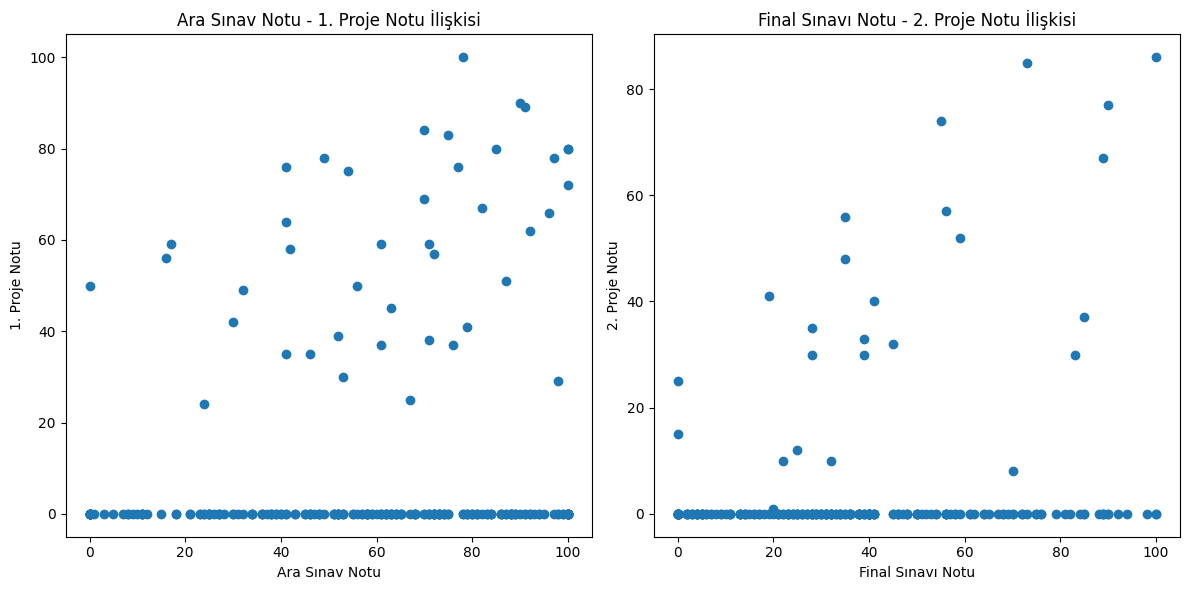

In [114]:
plt.figure(figsize=(12, 6))

# Scatter plot 1: Ara Sınav Notu vs 1. Proje Notu
plt.subplot(1, 2, 1)
plt.scatter(merged_data["Arasınav Notu"], merged_data["1. Proje Notu"])
plt.xlabel("Ara Sınav Notu")
plt.ylabel("1. Proje Notu")
plt.title("Ara Sınav Notu - 1. Proje Notu İlişkisi")

# Scatter plot 2: Final Sınavı Notu vs 2. Proje Notu
plt.subplot(1, 2, 2)
plt.scatter(merged_data["Final Sınavı Notu"], merged_data["2. Proje Notu"])
plt.xlabel("Final Sınavı Notu")
plt.ylabel("2. Proje Notu")
plt.title("Final Sınavı Notu - 2. Proje Notu İlişkisi")

plt.tight_layout()  # Adjust spacing between subplots
plt.show()
